In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Case Study 1 - Dataset - Personal Loan Propensity.csv")

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,MALE,11/05/1967,516002,12,OWNED,MO,1,29800,23000,...,2,0,200000,23000.0,0,0,0,0,1,0
1,2,MALE,05/02/1988,517501,12,OWNED,MC,1,73502,40000,...,1,0,0,40000.0,500000,0,1,4,7,0
2,3,MALE,01/08/1970,516003,18,RENT,SC,2,46180,30000,...,1,0,30000,30000.0,0,1,0,0,0,0
3,4,MALE,22/05/1972,517213,18,OWNED,MO,2,29800,22100,...,2,0,42000,49900.0,0,0,0,2,6,0
4,5,FEMALE,12/04/1983,517503,12,OWNED,MO,2,29800,18500,...,1,0,15000,18500.0,0,0,0,0,0,0


In [4]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32'],
      dtype='object')

0    262356
1     20568
Name: V32, dtype: int64

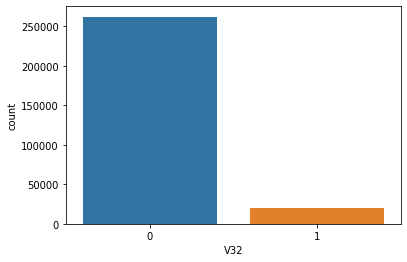

In [10]:
sns.countplot(x="V32", data=df)
df["V32"].value_counts()

In [11]:
baseline =  262356/282924 
baseline

0.9273020316410061

In [12]:
import datetime as DT
now = pd.Timestamp('now')

df["V3"] = pd.to_datetime(df["V3"])
df['V3'] = df['V3'].where(df['V3'] < now, df['V3'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['V3']).astype('<m8[Y]')    # 3
print(df[["age","V3"]].head())
df.columns

    age         V3
0  52.0 1967-11-05
1  31.0 1988-05-02
2  49.0 1970-01-08
3  47.0 1972-05-22
4  35.0 1983-12-04


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'age'],
      dtype='object')

In [13]:
lst_quant = df.select_dtypes(include="number")
lst_quant.columns

Index(['V1', 'V4', 'V5', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'V29', 'V30', 'V31', 'V32', 'age'],
      dtype='object')

In [14]:
lst_categorical = df.select_dtypes(include="object")
lst_categorical.columns

Index(['V2', 'V6', 'V7', 'V11', 'V12'], dtype='object')

In [15]:
for item in lst_categorical:
    print(item)
    print(df[item].value_counts())

V2
MALE      240846
FEMALE     42078
Name: V2, dtype: int64
V6
OWNED               248151
RENT                 34170
OWENED BY OFFICE       603
Name: V6, dtype: int64
V7
SC    109052
MC     92819
MO     81053
Name: V7, dtype: int64
V11
M    202469
F     56061
L     24394
Name: V11, dtype: int64
V12
NON-CASH    195894
CASH         87030
Name: V12, dtype: int64


In [16]:
sex = pd.get_dummies(df["V2"],drop_first=True)
sex.head(3)

,MALE
0,1
1,1
2,1


In [17]:
residence = pd.get_dummies(df["V6"])
residence.head(3)

,OWENED BY OFFICE,OWNED,RENT
0,0,1,0
1,0,1,0
2,0,0,1


In [18]:
product = pd.get_dummies(df["V7"])
product.head(3)

,MC,MO,SC
0,0,1,0
1,1,0,0
2,0,0,1


In [19]:
loan_type = pd.get_dummies(df["V11"])
loan_type.head(3)

,F,L,M
0,0,0,1
1,0,0,1
2,0,0,1


In [20]:
payment = pd.get_dummies(df["V12"],drop_first=True)
payment.head(3)

,NON-CASH
0,1
1,1
2,1


In [21]:
df = df.drop(["V1","V2","V3","V4","V6","V7","V11","V12"],axis=1)
df.columns

Index(['V5', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'V29', 'V30', 'V31', 'V32', 'age'],
      dtype='object')

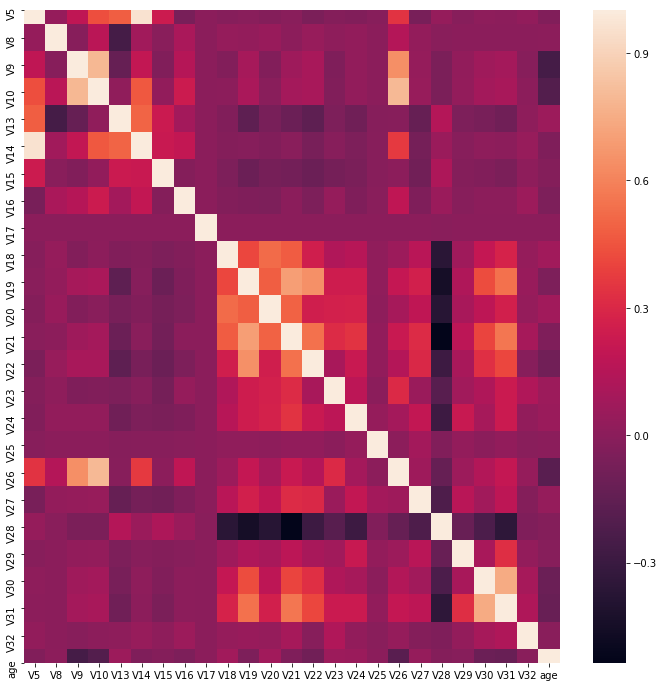

In [22]:
lst_quant = df.select_dtypes(include="number")
plt.subplots(figsize=(12,12))
sns.heatmap(lst_quant.corr())

In [24]:
df =pd.concat([df,sex,residence,product,loan_type,payment],axis=1)
df.head()

,V5,V8,V9,V10,V13,V14,V15,V16,V17,V18,...,OWENED BY OFFICE,OWNED,RENT,MC,MO,SC,F,L,M,NON-CASH
0,12,1,29800,23000,8.99,12,0,0,12500.0,1,...,0,1,0,0,1,0,0,0,1,1
1,12,1,73502,40000,6.99,12,0,0,25000.0,2,...,0,1,0,1,0,0,0,0,1,1
2,18,2,46180,30000,8.99,18,0,0,44000.0,0,...,0,0,1,0,0,1,0,0,1,1
3,18,2,29800,22100,8.99,18,0,0,15000.0,2,...,0,1,0,0,1,0,0,0,1,1
4,12,2,29800,18500,6.99,12,0,0,35001.0,0,...,0,1,0,0,1,0,0,0,1,1


In [25]:
df.columns

Index(['V5', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'V29', 'V30', 'V31', 'V32', 'age', 'MALE', 'OWENED BY OFFICE', 'OWNED',
       'RENT', 'MC', 'MO', 'SC', 'F', 'L', 'M', 'NON-CASH', 'MALE',
       'OWENED BY OFFICE', 'OWNED', 'RENT', 'MC', 'MO', 'SC', 'F', 'L', 'M',
       'NON-CASH'],
      dtype='object')

In [26]:
len(df.select_dtypes(include="object").columns)

0

In [27]:
len(df.select_dtypes(include="number").columns)

47

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve,roc_auc_score

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
y = df["V32"]
X = df.drop(["V32"],axis=1)

In [31]:
X.columns

Index(['V5', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'V29', 'V30', 'V31', 'age', 'MALE', 'OWENED BY OFFICE', 'OWNED', 'RENT',
       'MC', 'MO', 'SC', 'F', 'L', 'M', 'NON-CASH', 'MALE', 'OWENED BY OFFICE',
       'OWNED', 'RENT', 'MC', 'MO', 'SC', 'F', 'L', 'M', 'NON-CASH'],
      dtype='object')

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [33]:
log_model = LogisticRegression(verbose=True)

In [34]:
log_model.fit(x_train,y_train)

C:\Users\himan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=True,
                   warm_start=False)

In [35]:
prediction = log_model.predict(x_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     78632
           1       0.00      0.00      0.00      6246

    accuracy                           0.93     84878
   macro avg       0.46      0.50      0.48     84878
weighted avg       0.86      0.93      0.89     84878



C:\Users\himan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
print(accuracy_score(prediction,y_test))

0.9264120266735786


In [38]:
print(roc_auc_score(y_test,prediction))

0.5


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc_model =RandomForestClassifier(n_estimators=1000,max_depth=10)

In [41]:
rfc_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
rfc_prediction = rfc_model.predict(x_test)

In [43]:
print(classification_report(y_test,rfc_prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     78632
           1       0.00      0.00      0.00      6246

    accuracy                           0.93     84878
   macro avg       0.46      0.50      0.48     84878
weighted avg       0.86      0.93      0.89     84878



C:\Users\himan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
print(accuracy_score(rfc_prediction,y_test))

0.9264120266735786


In [45]:
print(roc_auc_score(y_test,rfc_prediction))

0.5


In [47]:
from lightgbm import LGBMClassifier

In [48]:
model = LGBMClassifier(learning_rate=8e-2, n_estimators=3000).fit(x_train, y_train, eval_set=[(x_test, y_test)])

[1]	valid_0's binary_logloss: 0.259434
[2]	valid_0's binary_logloss: 0.256875
[3]	valid_0's binary_logloss: 0.254405
[4]	valid_0's binary_logloss: 0.25273
[5]	valid_0's binary_logloss: 0.251119
[6]	valid_0's binary_logloss: 0.249749
[7]	valid_0's binary_logloss: 0.248589
[8]	valid_0's binary_logloss: 0.247608
[9]	valid_0's binary_logloss: 0.246666
[10]	valid_0's binary_logloss: 0.245928
[11]	valid_0's binary_logloss: 0.245196
[12]	valid_0's binary_logloss: 0.244635
[13]	valid_0's binary_logloss: 0.244011
[14]	valid_0's binary_logloss: 0.243457
[15]	valid_0's binary_logloss: 0.242943
[16]	valid_0's binary_logloss: 0.242561
[17]	valid_0's binary_logloss: 0.242166
[18]	valid_0's binary_logloss: 0.241791
[19]	valid_0's binary_logloss: 0.24147
[20]	valid_0's binary_logloss: 0.241119
[21]	valid_0's binary_logloss: 0.240664
[22]	valid_0's binary_logloss: 0.240326
[23]	valid_0's binary_logloss: 0.239985
[24]	valid_0's binary_logloss: 0.239702
[25]	valid_0's binary_logloss: 0.239492
[26]	valid_

[207]	valid_0's binary_logloss: 0.234792
[208]	valid_0's binary_logloss: 0.234791
[209]	valid_0's binary_logloss: 0.234777
[210]	valid_0's binary_logloss: 0.234778
[211]	valid_0's binary_logloss: 0.234771
[212]	valid_0's binary_logloss: 0.234761
[213]	valid_0's binary_logloss: 0.234764
[214]	valid_0's binary_logloss: 0.234757
[215]	valid_0's binary_logloss: 0.234769
[216]	valid_0's binary_logloss: 0.23477
[217]	valid_0's binary_logloss: 0.234779
[218]	valid_0's binary_logloss: 0.23476
[219]	valid_0's binary_logloss: 0.23477
[220]	valid_0's binary_logloss: 0.23479
[221]	valid_0's binary_logloss: 0.234766
[222]	valid_0's binary_logloss: 0.234771
[223]	valid_0's binary_logloss: 0.234784
[224]	valid_0's binary_logloss: 0.234792
[225]	valid_0's binary_logloss: 0.234805
[226]	valid_0's binary_logloss: 0.234811
[227]	valid_0's binary_logloss: 0.23481
[228]	valid_0's binary_logloss: 0.234812
[229]	valid_0's binary_logloss: 0.234817
[230]	valid_0's binary_logloss: 0.234815
[231]	valid_0's binar

[412]	valid_0's binary_logloss: 0.235459
[413]	valid_0's binary_logloss: 0.235457
[414]	valid_0's binary_logloss: 0.235466
[415]	valid_0's binary_logloss: 0.235463
[416]	valid_0's binary_logloss: 0.235446
[417]	valid_0's binary_logloss: 0.235463
[418]	valid_0's binary_logloss: 0.235468
[419]	valid_0's binary_logloss: 0.235456
[420]	valid_0's binary_logloss: 0.235465
[421]	valid_0's binary_logloss: 0.235478
[422]	valid_0's binary_logloss: 0.235484
[423]	valid_0's binary_logloss: 0.235469
[424]	valid_0's binary_logloss: 0.235465
[425]	valid_0's binary_logloss: 0.235478
[426]	valid_0's binary_logloss: 0.235481
[427]	valid_0's binary_logloss: 0.235495
[428]	valid_0's binary_logloss: 0.235487
[429]	valid_0's binary_logloss: 0.235493
[430]	valid_0's binary_logloss: 0.2355
[431]	valid_0's binary_logloss: 0.235491
[432]	valid_0's binary_logloss: 0.235488
[433]	valid_0's binary_logloss: 0.235491
[434]	valid_0's binary_logloss: 0.235502
[435]	valid_0's binary_logloss: 0.235504
[436]	valid_0's bi

[613]	valid_0's binary_logloss: 0.236153
[614]	valid_0's binary_logloss: 0.236164
[615]	valid_0's binary_logloss: 0.236164
[616]	valid_0's binary_logloss: 0.23617
[617]	valid_0's binary_logloss: 0.236176
[618]	valid_0's binary_logloss: 0.236183
[619]	valid_0's binary_logloss: 0.236176
[620]	valid_0's binary_logloss: 0.236189
[621]	valid_0's binary_logloss: 0.236195
[622]	valid_0's binary_logloss: 0.236184
[623]	valid_0's binary_logloss: 0.236185
[624]	valid_0's binary_logloss: 0.236181
[625]	valid_0's binary_logloss: 0.23619
[626]	valid_0's binary_logloss: 0.236188
[627]	valid_0's binary_logloss: 0.236184
[628]	valid_0's binary_logloss: 0.236183
[629]	valid_0's binary_logloss: 0.236183
[630]	valid_0's binary_logloss: 0.236187
[631]	valid_0's binary_logloss: 0.236187
[632]	valid_0's binary_logloss: 0.23619
[633]	valid_0's binary_logloss: 0.236203
[634]	valid_0's binary_logloss: 0.236207
[635]	valid_0's binary_logloss: 0.236208
[636]	valid_0's binary_logloss: 0.236214
[637]	valid_0's bin

[817]	valid_0's binary_logloss: 0.237011
[818]	valid_0's binary_logloss: 0.237013
[819]	valid_0's binary_logloss: 0.237018
[820]	valid_0's binary_logloss: 0.237018
[821]	valid_0's binary_logloss: 0.23702
[822]	valid_0's binary_logloss: 0.237025
[823]	valid_0's binary_logloss: 0.237028
[824]	valid_0's binary_logloss: 0.237018
[825]	valid_0's binary_logloss: 0.237027
[826]	valid_0's binary_logloss: 0.237021
[827]	valid_0's binary_logloss: 0.237031
[828]	valid_0's binary_logloss: 0.237045
[829]	valid_0's binary_logloss: 0.237048
[830]	valid_0's binary_logloss: 0.237061
[831]	valid_0's binary_logloss: 0.237055
[832]	valid_0's binary_logloss: 0.23707
[833]	valid_0's binary_logloss: 0.23707
[834]	valid_0's binary_logloss: 0.237063
[835]	valid_0's binary_logloss: 0.237062
[836]	valid_0's binary_logloss: 0.237066
[837]	valid_0's binary_logloss: 0.237068
[838]	valid_0's binary_logloss: 0.237078
[839]	valid_0's binary_logloss: 0.237088
[840]	valid_0's binary_logloss: 0.237078
[841]	valid_0's bin

[1020]	valid_0's binary_logloss: 0.238011
[1021]	valid_0's binary_logloss: 0.238016
[1022]	valid_0's binary_logloss: 0.238021
[1023]	valid_0's binary_logloss: 0.238023
[1024]	valid_0's binary_logloss: 0.238029
[1025]	valid_0's binary_logloss: 0.238039
[1026]	valid_0's binary_logloss: 0.238054
[1027]	valid_0's binary_logloss: 0.238062
[1028]	valid_0's binary_logloss: 0.238069
[1029]	valid_0's binary_logloss: 0.238079
[1030]	valid_0's binary_logloss: 0.238079
[1031]	valid_0's binary_logloss: 0.238085
[1032]	valid_0's binary_logloss: 0.238079
[1033]	valid_0's binary_logloss: 0.238089
[1034]	valid_0's binary_logloss: 0.238092
[1035]	valid_0's binary_logloss: 0.238089
[1036]	valid_0's binary_logloss: 0.238097
[1037]	valid_0's binary_logloss: 0.238102
[1038]	valid_0's binary_logloss: 0.238098
[1039]	valid_0's binary_logloss: 0.238108
[1040]	valid_0's binary_logloss: 0.238118
[1041]	valid_0's binary_logloss: 0.238111
[1042]	valid_0's binary_logloss: 0.238126
[1043]	valid_0's binary_logloss: 0

[1221]	valid_0's binary_logloss: 0.239137
[1222]	valid_0's binary_logloss: 0.239141
[1223]	valid_0's binary_logloss: 0.239156
[1224]	valid_0's binary_logloss: 0.239157
[1225]	valid_0's binary_logloss: 0.239168
[1226]	valid_0's binary_logloss: 0.239172
[1227]	valid_0's binary_logloss: 0.239189
[1228]	valid_0's binary_logloss: 0.239191
[1229]	valid_0's binary_logloss: 0.239196
[1230]	valid_0's binary_logloss: 0.239199
[1231]	valid_0's binary_logloss: 0.239196
[1232]	valid_0's binary_logloss: 0.239204
[1233]	valid_0's binary_logloss: 0.239209
[1234]	valid_0's binary_logloss: 0.239215
[1235]	valid_0's binary_logloss: 0.239207
[1236]	valid_0's binary_logloss: 0.239217
[1237]	valid_0's binary_logloss: 0.23923
[1238]	valid_0's binary_logloss: 0.23923
[1239]	valid_0's binary_logloss: 0.239221
[1240]	valid_0's binary_logloss: 0.239222
[1241]	valid_0's binary_logloss: 0.239246
[1242]	valid_0's binary_logloss: 0.239265
[1243]	valid_0's binary_logloss: 0.239274
[1244]	valid_0's binary_logloss: 0.2

[1419]	valid_0's binary_logloss: 0.240383
[1420]	valid_0's binary_logloss: 0.240379
[1421]	valid_0's binary_logloss: 0.240389
[1422]	valid_0's binary_logloss: 0.240411
[1423]	valid_0's binary_logloss: 0.240421
[1424]	valid_0's binary_logloss: 0.240415
[1425]	valid_0's binary_logloss: 0.240421
[1426]	valid_0's binary_logloss: 0.240425
[1427]	valid_0's binary_logloss: 0.240438
[1428]	valid_0's binary_logloss: 0.24045
[1429]	valid_0's binary_logloss: 0.240458
[1430]	valid_0's binary_logloss: 0.240462
[1431]	valid_0's binary_logloss: 0.240461
[1432]	valid_0's binary_logloss: 0.240484
[1433]	valid_0's binary_logloss: 0.240495
[1434]	valid_0's binary_logloss: 0.240505
[1435]	valid_0's binary_logloss: 0.240517
[1436]	valid_0's binary_logloss: 0.240529
[1437]	valid_0's binary_logloss: 0.240541
[1438]	valid_0's binary_logloss: 0.240548
[1439]	valid_0's binary_logloss: 0.240545
[1440]	valid_0's binary_logloss: 0.240547
[1441]	valid_0's binary_logloss: 0.24055
[1442]	valid_0's binary_logloss: 0.2

[1811]	valid_0's binary_logloss: 0.24271
[1812]	valid_0's binary_logloss: 0.242724
[1813]	valid_0's binary_logloss: 0.242741
[1814]	valid_0's binary_logloss: 0.242733
[1815]	valid_0's binary_logloss: 0.242746
[1816]	valid_0's binary_logloss: 0.242758
[1817]	valid_0's binary_logloss: 0.242764
[1818]	valid_0's binary_logloss: 0.242775
[1819]	valid_0's binary_logloss: 0.242786
[1820]	valid_0's binary_logloss: 0.242805
[1821]	valid_0's binary_logloss: 0.2428
[1822]	valid_0's binary_logloss: 0.242811
[1823]	valid_0's binary_logloss: 0.242835
[1824]	valid_0's binary_logloss: 0.242834
[1825]	valid_0's binary_logloss: 0.242829
[1826]	valid_0's binary_logloss: 0.242833
[1827]	valid_0's binary_logloss: 0.242831
[1828]	valid_0's binary_logloss: 0.242829
[1829]	valid_0's binary_logloss: 0.242829
[1830]	valid_0's binary_logloss: 0.242824
[1831]	valid_0's binary_logloss: 0.242825
[1832]	valid_0's binary_logloss: 0.242833
[1833]	valid_0's binary_logloss: 0.242856
[1834]	valid_0's binary_logloss: 0.24

[2008]	valid_0's binary_logloss: 0.243879
[2009]	valid_0's binary_logloss: 0.243897
[2010]	valid_0's binary_logloss: 0.243896
[2011]	valid_0's binary_logloss: 0.243898
[2012]	valid_0's binary_logloss: 0.243919
[2013]	valid_0's binary_logloss: 0.243911
[2014]	valid_0's binary_logloss: 0.243923
[2015]	valid_0's binary_logloss: 0.243912
[2016]	valid_0's binary_logloss: 0.243916
[2017]	valid_0's binary_logloss: 0.243918
[2018]	valid_0's binary_logloss: 0.243919
[2019]	valid_0's binary_logloss: 0.243918
[2020]	valid_0's binary_logloss: 0.243919
[2021]	valid_0's binary_logloss: 0.24392
[2022]	valid_0's binary_logloss: 0.243931
[2023]	valid_0's binary_logloss: 0.24393
[2024]	valid_0's binary_logloss: 0.243933
[2025]	valid_0's binary_logloss: 0.243941
[2026]	valid_0's binary_logloss: 0.243949
[2027]	valid_0's binary_logloss: 0.24396
[2028]	valid_0's binary_logloss: 0.243966
[2029]	valid_0's binary_logloss: 0.243973
[2030]	valid_0's binary_logloss: 0.243983
[2031]	valid_0's binary_logloss: 0.24

[2209]	valid_0's binary_logloss: 0.245263
[2210]	valid_0's binary_logloss: 0.24528
[2211]	valid_0's binary_logloss: 0.245288
[2212]	valid_0's binary_logloss: 0.245288
[2213]	valid_0's binary_logloss: 0.245303
[2214]	valid_0's binary_logloss: 0.24531
[2215]	valid_0's binary_logloss: 0.24531
[2216]	valid_0's binary_logloss: 0.245315
[2217]	valid_0's binary_logloss: 0.245318
[2218]	valid_0's binary_logloss: 0.245332
[2219]	valid_0's binary_logloss: 0.24533
[2220]	valid_0's binary_logloss: 0.245336
[2221]	valid_0's binary_logloss: 0.245342
[2222]	valid_0's binary_logloss: 0.245357
[2223]	valid_0's binary_logloss: 0.245375
[2224]	valid_0's binary_logloss: 0.245378
[2225]	valid_0's binary_logloss: 0.245378
[2226]	valid_0's binary_logloss: 0.245399
[2227]	valid_0's binary_logloss: 0.245399
[2228]	valid_0's binary_logloss: 0.245411
[2229]	valid_0's binary_logloss: 0.245413
[2230]	valid_0's binary_logloss: 0.245417
[2231]	valid_0's binary_logloss: 0.24542
[2232]	valid_0's binary_logloss: 0.2454

[2406]	valid_0's binary_logloss: 0.246521
[2407]	valid_0's binary_logloss: 0.246514
[2408]	valid_0's binary_logloss: 0.246526
[2409]	valid_0's binary_logloss: 0.246524
[2410]	valid_0's binary_logloss: 0.246536
[2411]	valid_0's binary_logloss: 0.24654
[2412]	valid_0's binary_logloss: 0.246545
[2413]	valid_0's binary_logloss: 0.246553
[2414]	valid_0's binary_logloss: 0.24656
[2415]	valid_0's binary_logloss: 0.246566
[2416]	valid_0's binary_logloss: 0.246577
[2417]	valid_0's binary_logloss: 0.246585
[2418]	valid_0's binary_logloss: 0.246597
[2419]	valid_0's binary_logloss: 0.2466
[2420]	valid_0's binary_logloss: 0.246618
[2421]	valid_0's binary_logloss: 0.246615
[2422]	valid_0's binary_logloss: 0.246621
[2423]	valid_0's binary_logloss: 0.246637
[2424]	valid_0's binary_logloss: 0.246645
[2425]	valid_0's binary_logloss: 0.246653
[2426]	valid_0's binary_logloss: 0.246662
[2427]	valid_0's binary_logloss: 0.246673
[2428]	valid_0's binary_logloss: 0.246683
[2429]	valid_0's binary_logloss: 0.246

[2603]	valid_0's binary_logloss: 0.247851
[2604]	valid_0's binary_logloss: 0.247865
[2605]	valid_0's binary_logloss: 0.247876
[2606]	valid_0's binary_logloss: 0.247887
[2607]	valid_0's binary_logloss: 0.247891
[2608]	valid_0's binary_logloss: 0.2479
[2609]	valid_0's binary_logloss: 0.247907
[2610]	valid_0's binary_logloss: 0.24792
[2611]	valid_0's binary_logloss: 0.247925
[2612]	valid_0's binary_logloss: 0.247926
[2613]	valid_0's binary_logloss: 0.247935
[2614]	valid_0's binary_logloss: 0.24794
[2615]	valid_0's binary_logloss: 0.24794
[2616]	valid_0's binary_logloss: 0.247952
[2617]	valid_0's binary_logloss: 0.24796
[2618]	valid_0's binary_logloss: 0.247979
[2619]	valid_0's binary_logloss: 0.248001
[2620]	valid_0's binary_logloss: 0.247993
[2621]	valid_0's binary_logloss: 0.248001
[2622]	valid_0's binary_logloss: 0.248012
[2623]	valid_0's binary_logloss: 0.248022
[2624]	valid_0's binary_logloss: 0.24802
[2625]	valid_0's binary_logloss: 0.248041
[2626]	valid_0's binary_logloss: 0.248044

[2803]	valid_0's binary_logloss: 0.249124
[2804]	valid_0's binary_logloss: 0.249141
[2805]	valid_0's binary_logloss: 0.249153
[2806]	valid_0's binary_logloss: 0.249164
[2807]	valid_0's binary_logloss: 0.249176
[2808]	valid_0's binary_logloss: 0.249182
[2809]	valid_0's binary_logloss: 0.249192
[2810]	valid_0's binary_logloss: 0.249206
[2811]	valid_0's binary_logloss: 0.249209
[2812]	valid_0's binary_logloss: 0.249222
[2813]	valid_0's binary_logloss: 0.249224
[2814]	valid_0's binary_logloss: 0.249237
[2815]	valid_0's binary_logloss: 0.249238
[2816]	valid_0's binary_logloss: 0.249242
[2817]	valid_0's binary_logloss: 0.249247
[2818]	valid_0's binary_logloss: 0.249251
[2819]	valid_0's binary_logloss: 0.24927
[2820]	valid_0's binary_logloss: 0.24927
[2821]	valid_0's binary_logloss: 0.24926
[2822]	valid_0's binary_logloss: 0.249259
[2823]	valid_0's binary_logloss: 0.249279
[2824]	valid_0's binary_logloss: 0.249294
[2825]	valid_0's binary_logloss: 0.249314
[2826]	valid_0's binary_logloss: 0.24

In [50]:
lgbm_predict = model.predict(x_test)

In [51]:
print(classification_report(y_test,lgbm_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     78632
           1       0.49      0.03      0.06      6246

    accuracy                           0.93     84878
   macro avg       0.71      0.51      0.51     84878
weighted avg       0.90      0.93      0.89     84878



In [52]:
print(accuracy_score(lgbm_predict,y_test))

0.926317773745847


In [53]:
print(roc_auc_score(y_test,lgbm_predict))

0.5134348573380992


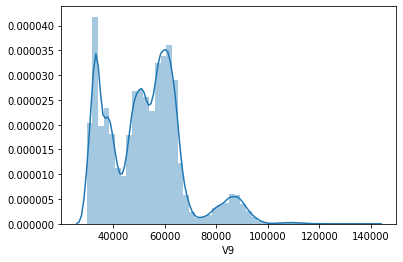

In [54]:
sns.distplot(df["V9"])

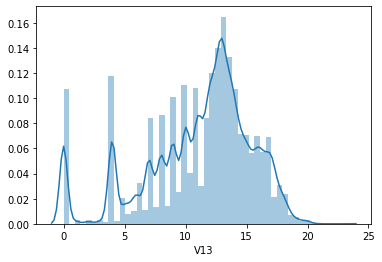

In [55]:
sns.distplot(df["V13"])

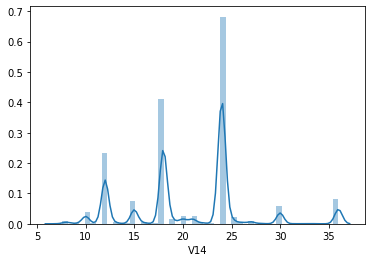

In [56]:
sns.distplot(df["V14"])

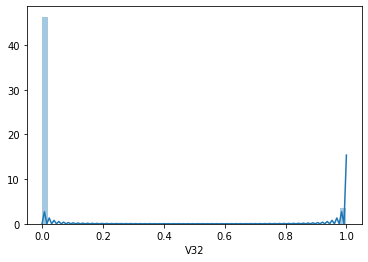

In [57]:
sns.distplot(df["V32"])

In [58]:
lst_coeff=[]
for item in log_model.coef_ :
    lst_coeff.append(item)
lst_coeff

[array([-4.35572493e-03, -4.84476800e-04, -3.12238943e-05, -8.36423577e-06,
        -6.38611021e-03, -4.64995724e-03, -2.10773490e-04,  6.19533423e-05,
        -4.20709751e-07,  4.28959662e-04,  1.90923374e-03,  1.33035279e-03,
         2.05812028e-03,  6.05194130e-07,  3.16706360e-04,  1.75638124e-04,
        -1.35982434e-07,  1.09559611e-05, -1.82443131e-07, -5.40243607e-04,
         1.48668255e-04,  1.42864992e-03,  3.03508429e-03, -2.20422155e-02,
        -3.08113631e-04,  4.68988328e-07, -4.53049179e-04, -2.45510102e-05,
         4.10095893e-04, -9.54671494e-04,  6.74444009e-05, -8.77424666e-05,
        -1.27510285e-04, -2.61878449e-04,  2.87956134e-04, -3.08113631e-04,
         4.68988328e-07, -4.53049179e-04, -2.45510102e-05,  4.10095893e-04,
        -9.54671494e-04,  6.74444009e-05, -8.77424666e-05, -1.27510285e-04,
        -2.61878449e-04,  2.87956134e-04])]

In [59]:
y = (df.drop(["V32"],axis=1).columns)
y

Index(['V5', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'V29', 'V30', 'V31', 'age', 'MALE', 'OWENED BY OFFICE', 'OWNED', 'RENT',
       'MC', 'MO', 'SC', 'F', 'L', 'M', 'NON-CASH', 'MALE', 'OWENED BY OFFICE',
       'OWNED', 'RENT', 'MC', 'MO', 'SC', 'F', 'L', 'M', 'NON-CASH'],
      dtype='object')

In [60]:
coeff = [-5.31236865e-03, -1.22736265e-03, -2.70678954e-05, -4.18269065e-06,
        -1.12297689e-02, -5.77190305e-03, -1.95661491e-04,  5.82626833e-05,
        -1.24831151e-07,  1.51416479e-03,  4.83642864e-03,  4.73705663e-03,
         5.88092044e-03, -2.56226381e-04,  1.45810484e-03,  5.17954757e-04,
        -1.12994431e-07,  1.34831421e-05, -2.09534642e-07, -1.26580077e-03,
         4.14365818e-04,  3.89352612e-03,  8.34254477e-03, -3.33507401e-02,
        -4.17615130e-04,  1.13354177e-06, -8.91641073e-04, -8.07510471e-05,
         1.01740416e-03, -1.94641195e-03, -4.22507896e-05, -2.29262340e-05,
        -3.52943145e-04, -5.95389199e-04,  7.44801826e-04]

coeff_abs=[]
for item in coeff:
    coeff_abs.append(item)

In [61]:
labels=['V5', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'V29', 'V30', 'V31', 'age', 'MALE', 'OWENED BY OFFICE', 'OWNED', 'RENT',
       'MC', 'MO', 'SC', 'F', 'L', 'M', 'NON-CASH']

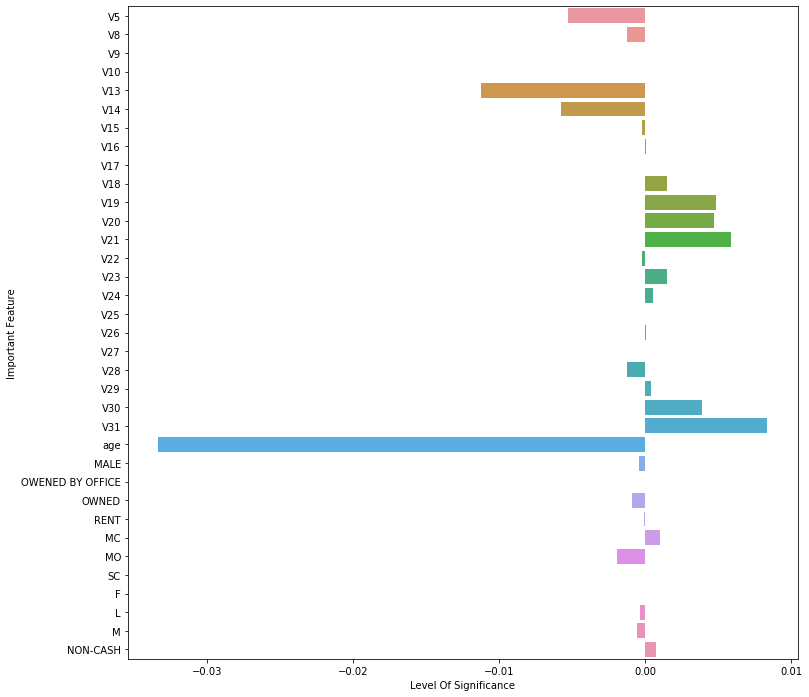

In [62]:
plt.subplots(figsize=(12,12))
plt.xlabel("Level Of Significance")
plt.ylabel("Important Feature")
g = sns.barplot(y=labels,x=coeff)
# for index, row in df_coeff.iterrows():
#     g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

In [63]:
coeff_abs=[]
for item in coeff:
    coeff_abs.append(abs(item))
coeff_abs.sort(reverse=True)

In [109]:
print(coeff_abs)

[0.0333507401, 0.0112297689, 0.00834254477, 0.00588092044, 0.00577190305, 0.00531236865, 0.00483642864, 0.00473705663, 0.00389352612, 0.00194641195, 0.00151416479, 0.00145810484, 0.00126580077, 0.00122736265, 0.00101740416, 0.000891641073, 0.000744801826, 0.000595389199, 0.000517954757, 0.00041761513, 0.000414365818, 0.000352943145, 0.000256226381, 0.000195661491, 8.07510471e-05, 5.82626833e-05, 4.22507896e-05, 2.70678954e-05, 2.2926234e-05, 1.34831421e-05, 4.18269065e-06, 1.13354177e-06, 2.09534642e-07, 1.24831151e-07, 1.12994431e-07]


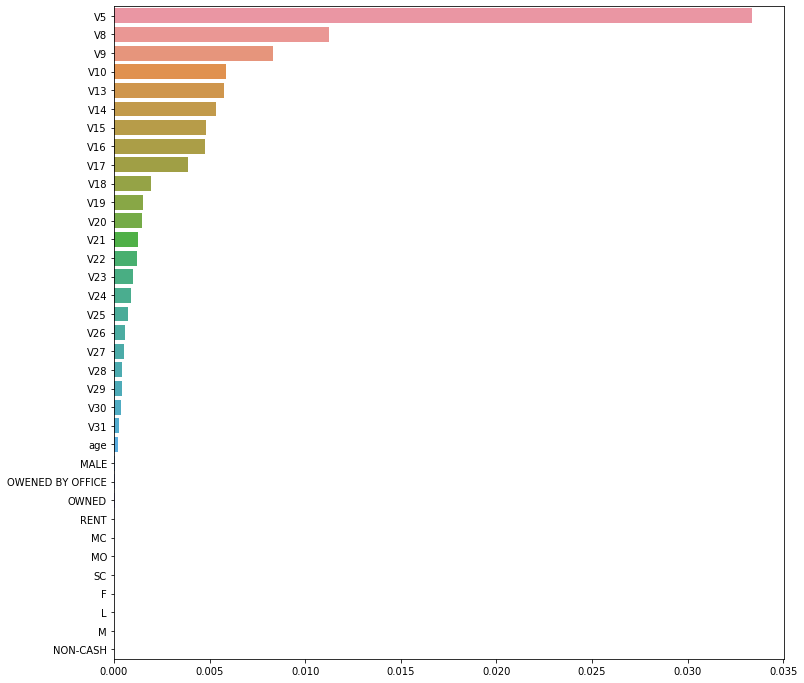

In [65]:
plt.subplots(figsize=(12,12))
sns.barplot(y=labels,x=coeff_abs)

In [66]:
df_coeff = pd.DataFrame(data=coeff,index=labels)

In [67]:
df_coeff.sort_values

<bound method DataFrame.sort_values of                              0
V5               -5.312369e-03
V8               -1.227363e-03
V9               -2.706790e-05
V10              -4.182691e-06
V13              -1.122977e-02
V14              -5.771903e-03
V15              -1.956615e-04
V16               5.826268e-05
V17              -1.248312e-07
V18               1.514165e-03
V19               4.836429e-03
V20               4.737057e-03
V21               5.880920e-03
V22              -2.562264e-04
V23               1.458105e-03
V24               5.179548e-04
V25              -1.129944e-07
V26               1.348314e-05
V27              -2.095346e-07
V28              -1.265801e-03
V29               4.143658e-04
V30               3.893526e-03
V31               8.342545e-03
age              -3.335074e-02
MALE             -4.176151e-04
OWENED BY OFFICE  1.133542e-06
OWNED            -8.916411e-04
RENT             -8.075105e-05
MC                1.017404e-03
MO               -1.946412e-03
